
# Line length detector

Demo'ing line length detector for possible artifact cleaning 

This tutorial primarily covers the ``py_ecog_utls.line_length`` module.


In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from py_ecog_utils import line_length
import numpy as np

# use neurodsp toolbox to generate signal and plot

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed,create_times

# import utilities for plotting
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_bursts

# simulate a signal , insert some spikes (to do)

In [6]:
# simulation settings
fs = 256
n_seconds = 10

#define simulation 
components= {'sim_synaptic_current' : {'n_neurons':1000, 'firing_rate':2,
                                       't_ker':1, 'tau_r':0.002, 'tau_d':0.02},
             'sim_bursty_oscillation': {'freq':10, 'enter_burst':0.2, 'leave_burst':0.2}}

#simulate signal w/ bursty oscillation, aperiodic currrent and time vector
sig = sim_combined(n_seconds,fs, components)
times = create_times(n_seconds, fs)

In [7]:
#a = np.tile(np.arange(1,11),(2,1)).T
a = np.array([[[1,2,3,4,5,6,7,8,9,10]]])
b = line_length.line_length_transform(a,1,3)
b

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2., nan, nan, nan])

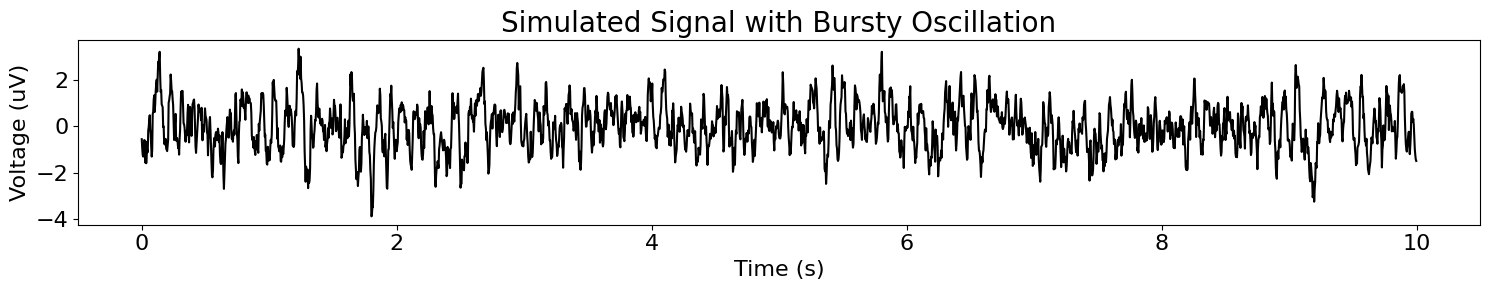

In [8]:
# plot
plot_time_series(times, sig, fs=fs, title='Simulated Signal with Bursty Oscillation')   

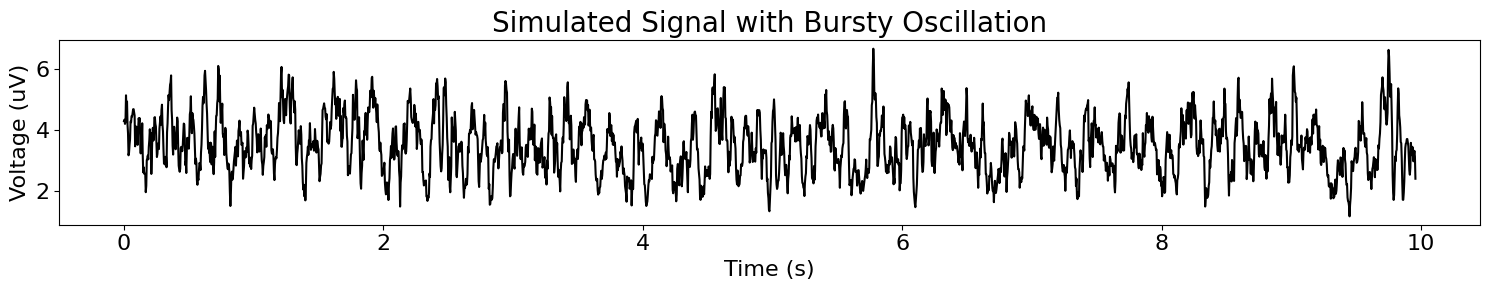

In [9]:
sig_ll = line_length.line_length_transform(sig,sfx=256,llw=0.04)
plot_time_series(times, sig_ll, fs=fs, title='Simulated Signal with Bursty Oscillation')   

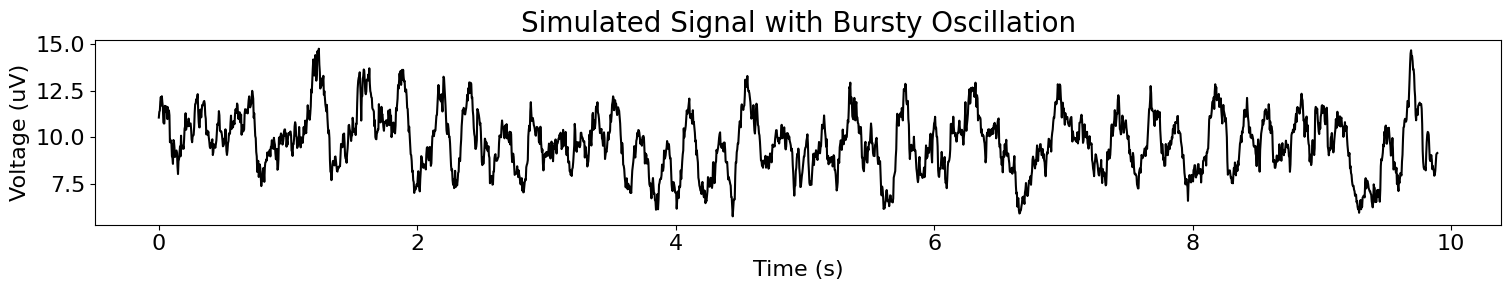

In [10]:
sig_ll = line_length.line_length_transform(sig,sfx=256,llw=0.1)
plot_time_series(times, sig_ll, fs=fs, title='Simulated Signal with Bursty Oscillation')   

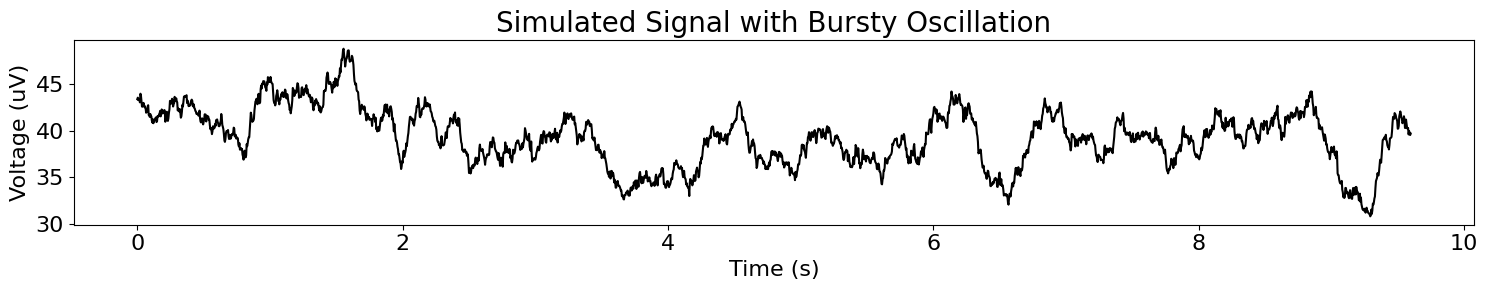

In [11]:
sig_ll = line_length.line_length_transform(sig,sfx=256,llw=0.4)
plot_time_series(times, sig_ll, fs=fs, title='Simulated Signal with Bursty Oscillation')   